In [37]:
!git clone https://github.com/NicoEssi/Undercomplete_Autoencoder.git

fatal: destination path 'Undercomplete_Autoencoder' already exists and is not an empty directory.


In [0]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [0]:
training_set0 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/bindigit_trn.csv", header = None)
training_set0 = np.array(training_set0, dtype = "int")

training_set1 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/targetdigit_trn.csv", header = None)
#training_set1 = np.array(training_set1, dtype = "int")

test_set0 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/bindigit_tst.csv", header = None)
test_set0 = np.array(test_set0, dtype = "int")

test_set1 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/targetdigit_tst.csv", header = None)
#test_set1 = np.array(test_set1, dtype = "int")

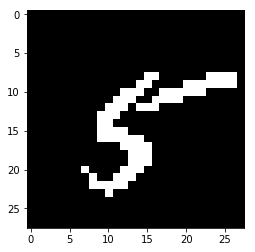

In [40]:
def displayMNIST(data, index):
    display_number = data[index, :]
    display_number = display_number.reshape([28, 28])
    plt.imshow(display_number, cmap='gray')
    plt.show
    
def displayMNIST_alt(image):
    image = image.reshape([28,28])
    plt.imshow(image, cmap='gray')
    plt.show

displayMNIST(training_set0, 135) # test 0
#displayMNIST(test_set0, 137) # test 0

In [0]:
trn_data = torch.cuda.FloatTensor(training_set0)
tst_data = torch.cuda.FloatTensor(test_set0)

In [0]:
class autoenc(nn.Module):
    def __init__(self, nodes = 100):
        super(autoenc, self).__init__() # inheritence
        self.full_connection0 = nn.Linear(784, nodes) # encoding weights
        self.full_connection1 = nn.Linear(nodes, 784) # decoding weights
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.full_connection0(x)) # input encoding
        x = self.full_connection1(x) # output decoding
        return x

In [0]:
model = autoenc().cuda() #.cuda() - to move to GPU
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),
                          lr = 1e-5, weight_decay = 1/2)



In [0]:
num_epochs = 500
batch_size = 32
length = int(len(trn_data) / batch_size)

In [45]:
loss_epoch1 = []

for epoch in range(num_epochs):
    train_loss = 0
    score = 0. 
    
    
    for num_data in range(length - 2):
        #print(str(num_data) + "; length = " + str(length) + "   num_data = " + str(num_data))
        batch_ind = (batch_size * num_data)
        input = Variable(trn_data[batch_ind : batch_ind + batch_size]).cuda() #.cuda() - to move to GPU
        # === forward propagation ===
        #print("batch_ind = " + str(batch_ind) + "   batch_ind + batch_size = " + str(batch_ind + batch_size))
        output = model(input)
        loss = criterion(output, trn_data[batch_ind : batch_ind + batch_size]) # loss between ŷ and y
        # === backward propagation ===
        loss.backward()
        # === calculating epoch loss ===
        train_loss += np.sqrt(loss.item())
        score += 1. #<- add for average loss error instead of total
        optimizer.step()
    
    loss_calculated = train_loss/score
    print('epoch: ' + str(epoch + 1) + '   loss: ' + str(loss_calculated))
    loss_epoch1.append(loss_calculated)

epoch: 1   loss: 0.4673505347025183
epoch: 2   loss: 0.4551069124010008
epoch: 3   loss: 0.4438752956065971
epoch: 4   loss: 0.4336978454798411
epoch: 5   loss: 0.42457664477883894
epoch: 6   loss: 0.41636007038103623
epoch: 7   loss: 0.40921140266229755
epoch: 8   loss: 0.4027518837389439
epoch: 9   loss: 0.39711618166794904
epoch: 10   loss: 0.3920096423912559
epoch: 11   loss: 0.3874439327469819
epoch: 12   loss: 0.3835002006092998
epoch: 13   loss: 0.3799832735335898
epoch: 14   loss: 0.37705652416721414
epoch: 15   loss: 0.37465170133207176
epoch: 16   loss: 0.37233166027302195
epoch: 17   loss: 0.3700341681431057
epoch: 18   loss: 0.36799609508313996
epoch: 19   loss: 0.36616200471011406
epoch: 20   loss: 0.36439204854631824
epoch: 21   loss: 0.36284785155198834
epoch: 22   loss: 0.3617095404072698
epoch: 23   loss: 0.3608795900170535
epoch: 24   loss: 0.3601918616954848
epoch: 25   loss: 0.3596724927525289
epoch: 26   loss: 0.3593875808429772
epoch: 27   loss: 0.3592384935964584

In [46]:
model2 = autoenc(nodes = 200).cuda() #.cuda() - to move to GPU
optimizer2 = optim.Adam(model2.parameters(),
                          lr = 1e-5, weight_decay = 1/2)
num_epochs = 500
batch_size = 32
length = int(len(trn_data) / batch_size)
loss_epoch2 = []

for epoch in range(num_epochs):
    train_loss = 0
    score = 0. 
    
    
    for num_data in range(length - 2):
        #print(str(num_data) + "; length = " + str(length) + "   num_data = " + str(num_data))
        batch_ind = (batch_size * num_data)
        input = Variable(trn_data[batch_ind : batch_ind + batch_size]).cuda() #.cuda() - to move to GPU
        # === forward propagation ===
        #print("batch_ind = " + str(batch_ind) + "   batch_ind + batch_size = " + str(batch_ind + batch_size))
        output = model2(input)
        loss = criterion(output, trn_data[batch_ind : batch_ind + batch_size]) # loss between ŷ and y
        # === backward propagation ===
        loss.backward()
        # === calculating epoch loss ===
        train_loss += np.sqrt(loss.item())
        score += 1. #<- add for average loss error instead of total
        optimizer2.step()
    
    loss_calculated = train_loss/score
    print('epoch: ' + str(epoch + 1) + '   loss: ' + str(loss_calculated))
    loss_epoch2.append(loss_calculated)



epoch: 1   loss: 0.4638129488634007
epoch: 2   loss: 0.4455741407437896
epoch: 3   loss: 0.4294607472608114
epoch: 4   loss: 0.41571118259955775
epoch: 5   loss: 0.40404081457834945
epoch: 6   loss: 0.394076256981686
epoch: 7   loss: 0.38563650777190067
epoch: 8   loss: 0.3783707790816947
epoch: 9   loss: 0.37228112211160724
epoch: 10   loss: 0.36732229211058764
epoch: 11   loss: 0.36282833445767326
epoch: 12   loss: 0.3592361565408447
epoch: 13   loss: 0.3565132839735185
epoch: 14   loss: 0.3541012454190101
epoch: 15   loss: 0.35224800067161505
epoch: 16   loss: 0.35104511747415923
epoch: 17   loss: 0.3501001791840164
epoch: 18   loss: 0.34944659711457515
epoch: 19   loss: 0.34934871743986323
epoch: 20   loss: 0.34953147945266605
epoch: 21   loss: 0.3496214230623349
epoch: 22   loss: 0.349788915269666
epoch: 23   loss: 0.35038097719847877
epoch: 24   loss: 0.35129460270666385
epoch: 25   loss: 0.3522117943483184
epoch: 26   loss: 0.3530778905605324
epoch: 27   loss: 0.3539760059363782

In [47]:
model3 = autoenc(nodes = 400).cuda() #.cuda() - to move to GPU
optimizer3 = optim.Adam(model3.parameters(),
                          lr = 1e-5, weight_decay = 1/2)
num_epochs = 500
batch_size = 32
length = int(len(trn_data) / batch_size)
loss_epoch3 = []

for epoch in range(num_epochs):
    train_loss = 0
    score = 0. 
    
    
    for num_data in range(length - 2):
        #print(str(num_data) + "; length = " + str(length) + "   num_data = " + str(num_data))
        batch_ind = (batch_size * num_data)
        input = Variable(trn_data[batch_ind : batch_ind + batch_size]).cuda() #.cuda() - to move to GPU
        # === forward propagation ===
        #print("batch_ind = " + str(batch_ind) + "   batch_ind + batch_size = " + str(batch_ind + batch_size))
        output = model3(input)
        loss = criterion(output, trn_data[batch_ind : batch_ind + batch_size]) # loss between ŷ and y
        # === backward propagation ===
        loss.backward()
        # === calculating epoch loss ===
        train_loss += np.sqrt(loss.item())
        score += 1. #<- add for average loss error instead of total
        optimizer3.step()
    
    loss_calculated = train_loss/score
    print('epoch: ' + str(epoch + 1) + '   loss: ' + str(loss_calculated))
    loss_epoch3.append(loss_calculated)


epoch: 1   loss: 0.460048170927648
epoch: 2   loss: 0.43012499826397765
epoch: 3   loss: 0.40544463992107294
epoch: 4   loss: 0.3859373297594615
epoch: 5   loss: 0.37107179254788764
epoch: 6   loss: 0.35968178036810483
epoch: 7   loss: 0.35133264085328786
epoch: 8   loss: 0.3450808718232906
epoch: 9   loss: 0.3407089273508277
epoch: 10   loss: 0.3381294972218169
epoch: 11   loss: 0.33629855950624993
epoch: 12   loss: 0.33528136647097395
epoch: 13   loss: 0.3350039197262499
epoch: 14   loss: 0.3345870299220824
epoch: 15   loss: 0.33433639258331527
epoch: 16   loss: 0.3348585434035172
epoch: 17   loss: 0.3358715495369851
epoch: 18   loss: 0.33680003242752377
epoch: 19   loss: 0.33752261742850465
epoch: 20   loss: 0.3379854988229493
epoch: 21   loss: 0.338157758918875
epoch: 22   loss: 0.33808493312416193
epoch: 23   loss: 0.33776439361678073
epoch: 24   loss: 0.33714602874444827
epoch: 25   loss: 0.33639234632547876
epoch: 26   loss: 0.33560835182328397
epoch: 27   loss: 0.33468585170734

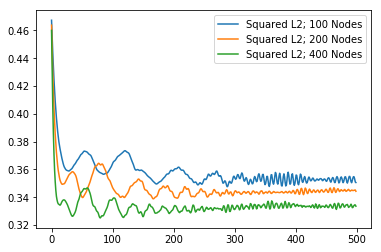

In [48]:
plt.plot(loss_epoch1, label = "Squared L2; 100 Nodes")
plt.plot(loss_epoch2, label = "Squared L2; 200 Nodes")
plt.plot(loss_epoch3, label = "Squared L2; 400 Nodes")
plt.legend()
plt.show()

In [49]:
test_loss = 0
s = 0.
length = len(tst_data)
outputs = []

for num_data in range (length):
    input = Variable(tst_data[num_data]).cuda()
    # === forward propagation ===
    output = model(input)
    outputs.append(output)
    loss = criterion(output, tst_data[num_data])
    # === calculating loss ===
    test_loss += np.sqrt(loss.item())
    s += 1.

loss_calculated = test_loss/s
print('n: 100 ; loss: ' + str(loss_calculated))


n: 100 ; loss: 0.34609146151017484


In [50]:
test_loss = 0
s = 0.
length = len(tst_data)
outputs2 = []

for num_data in range (length):
    input = Variable(tst_data[num_data]).cuda()
    # === forward propagation ===
    output = model2(input)
    outputs2.append(output)
    loss = criterion(output, tst_data[num_data])
    # === calculating loss ===
    test_loss += np.sqrt(loss.item())
    s += 1.

loss_calculated = test_loss/s
print('n: 200 ; loss: ' + str(loss_calculated))


n: 200 ; loss: 0.33874898992718616


In [51]:
test_loss = 0
s = 0.
length = len(tst_data)
outputs3 = []

for num_data in range (length):
    input = Variable(tst_data[num_data]).cuda()
    # === forward propagation ===
    output = model3(input)
    outputs3.append(output)
    loss = criterion(output, tst_data[num_data])
    # === calculating loss ===
    test_loss += np.sqrt(loss.item())
    s += 1.

loss_calculated = test_loss/s
print('n: 400 ; loss: ' + str(loss_calculated))


n: 400 ; loss: 0.32883702490179456


In [0]:
# 9 - Preprocessing for visualizing reconstructions from each model

# 9.0 - From input
outputs0_array = []
outputs0_array.append(test_set0[3])     # add 1
outputs0_array.append(test_set0[7])     # add 2
outputs0_array.append(test_set0[0])     # add 3
outputs0_array.append(test_set0[2])     # add 4
outputs0_array.append(test_set0[1])     # add 5
outputs0_array.append(test_set0[14])    # add 6
outputs0_array.append(test_set0[8])     # add 7
outputs0_array.append(test_set0[6])     # add 8
outputs0_array.append(test_set0[5])     # add 9
outputs0_array.append(test_set0[18])    # add 0

# 9.1 - From model 1
outputs_array = []
outputs_array.append(outputs[3].cpu().detach().numpy())     # add 1
outputs_array.append(outputs[7].cpu().detach().numpy())     # add 2
outputs_array.append(outputs[0].cpu().detach().numpy())     # add 3
outputs_array.append(outputs[2].cpu().detach().numpy())     # add 4
outputs_array.append(outputs[1].cpu().detach().numpy())     # add 5
outputs_array.append(outputs[14].cpu().detach().numpy())    # add 6
outputs_array.append(outputs[8].cpu().detach().numpy())     # add 7
outputs_array.append(outputs[6].cpu().detach().numpy())     # add 8
outputs_array.append(outputs[5].cpu().detach().numpy())     # add 9
outputs_array.append(outputs[18].cpu().detach().numpy())    # add 0

# 9.2 - From model 2
outputs2_array = []
outputs2_array.append(outputs2[3].cpu().detach().numpy())     # add 1
outputs2_array.append(outputs2[7].cpu().detach().numpy())     # add 2
outputs2_array.append(outputs2[0].cpu().detach().numpy())     # add 3
outputs2_array.append(outputs2[2].cpu().detach().numpy())     # add 4
outputs2_array.append(outputs2[1].cpu().detach().numpy())     # add 5
outputs2_array.append(outputs2[14].cpu().detach().numpy())    # add 6
outputs2_array.append(outputs2[8].cpu().detach().numpy())     # add 7
outputs2_array.append(outputs2[6].cpu().detach().numpy())     # add 8
outputs2_array.append(outputs2[5].cpu().detach().numpy())     # add 9
outputs2_array.append(outputs2[18].cpu().detach().numpy())    # add 0

# 9.3 - From model 3
outputs3_array = []
outputs3_array.append(outputs3[3].cpu().detach().numpy())     # add 1
outputs3_array.append(outputs3[7].cpu().detach().numpy())     # add 2
outputs3_array.append(outputs3[0].cpu().detach().numpy())     # add 3
outputs3_array.append(outputs3[2].cpu().detach().numpy())     # add 4
outputs3_array.append(outputs3[1].cpu().detach().numpy())     # add 5
outputs3_array.append(outputs3[14].cpu().detach().numpy())    # add 6
outputs3_array.append(outputs3[8].cpu().detach().numpy())     # add 7
outputs3_array.append(outputs3[6].cpu().detach().numpy())     # add 8
outputs3_array.append(outputs3[5].cpu().detach().numpy())     # add 9
outputs3_array.append(outputs3[18].cpu().detach().numpy())    # add 0

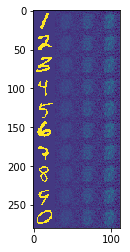

In [53]:
img_recon = []
for ind in range(10):
    img_rec = np.concatenate((outputs0_array[ind].reshape([28, 28]), 
                              outputs_array[ind].reshape([28, 28]),
                              outputs2_array[ind].reshape([28, 28]),
                              outputs3_array[ind].reshape([28, 28])), axis = 1)
    plt.imshow(img_rec, cmap = "gray")
    img_recon.append(img_rec)

img_complete = img_recon[0]
for app in range(9):
    img_complete = np.concatenate((img_complete, img_recon[app+1]), axis = 0)
plt.imshow(img_complete)

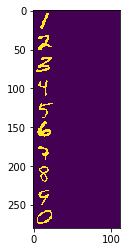

In [54]:
def binaryVis(val): # val = cutoff value
    img_complete_bin = img_complete
    img_complete_bin[img_complete_bin > val] = 1
    img_complete_bin[img_complete_bin < val] = 0
    plt.imshow(img_complete_bin)

binaryVis(0.5)


In [0]:
# 11 - Transform model weights into matrix arrays

# 11.1 - Converting weights from first model into arrays
weights11 = model.full_connection0.weight.data.cpu().detach().numpy()
weights12 = model.full_connection1.weight.data.cpu().detach().numpy()

# 11.2 - Converting weights from first model into arrays
weights21 = model2.full_connection0.weight.data.cpu().detach().numpy()
weights22 = model2.full_connection1.weight.data.cpu().detach().numpy()

# 11.3 - Converting weights from first model into arrays
weights31 = model3.full_connection0.weight.data.cpu().detach().numpy()
weights32 = model3.full_connection1.weight.data.cpu().detach().numpy()


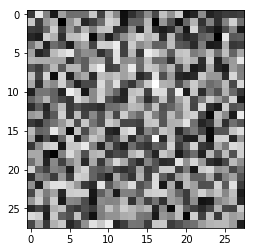

In [56]:
def displayWeights(weights, index):
    weights = weights[:, index].reshape([28, 28])
    plt.imshow(weights, cmap='gray')
    plt.show
displayWeights(weights32, 13)


28
28
56
28
84
28
112
28
140
28
168
28
196
28
224
28
252
28
280
28
308
28
336
28
364
28
392
28
420
28
448
28
476
28
504
28
532
28
28
28
56
28
84
28
112
28
140
28
168
28
196
28
224
28
252
28
280
28
308
28
336
28
364
28
392
28
420
28
448
28
476
28
504
28
532
28
28
28
56
28
84
28
112
28
140
28
168
28
196
28
224
28
252
28
280
28
308
28
336
28
364
28
392
28
420
28
448
28
476
28
504
28
532
28


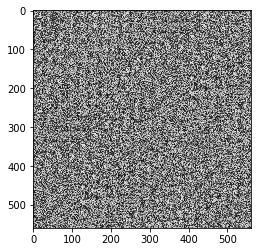

In [57]:
def displayWeights_full(weights):
    imgs_list = []
    for x_dim in range(20):
        for y_dim in range(20):
            if y_dim == 0 and x_dim == 0:
                imgs = weights[:, 0].reshape([28, 28])
            if y_dim == 0 and x_dim > 0:
                imgs_list.append(imgs)
                imgs = weights[:, x_dim].reshape([28, 28])
            if y_dim > 0:
                imgs = np.concatenate((imgs, weights[:, x_dim + y_dim].reshape([28, 28])), axis = 1)
    
    imgs_complete = imgs_list[0]
    for x_dim2 in range(19):
        print(len(imgs_complete))
        print(len(imgs_list[x_dim2]))
        imgs_complete = np.concatenate((imgs_complete, imgs_list[x_dim2]), axis = 0)
    
    plt.imshow(imgs_complete, cmap = "gray")

displayWeights_full(weights12)  # model with 100 nodes
displayWeights_full(weights22)  # model with 200 nodes
displayWeights_full(weights32)  # model with 400 nodes


In [58]:

# 13 - Calculate the sparseness of hidden layer representations

def SparsenessCalc(weights, val):
    weights_s = weights.ravel()
    weights_s[weights_s > val] = 0
    weights_s[weights_s < -val] = 0
    weights_s[weights_s > 0] = 1
    weights_s[weights_s < 0] = 1
    return sum(weights_s)/len(weights_s)

print("cutoff value: 1e-5")
print("model 1: " + str(SparsenessCalc(weights12.copy(), 1e-5)))
print("model 2: " + str(SparsenessCalc(weights22.copy(), 1e-5)))
print("model 3: " + str(SparsenessCalc(weights32.copy(), 1e-5)))
sum_sparse = SparsenessCalc(weights12.copy(), 1e-5) + SparsenessCalc(weights22.copy(), 1e-5) + SparsenessCalc(weights32.copy(), 1e-5)
print("average: " + str(sum_sparse/3))

cutoff value: 1e-5
model 1: 0.0016454081632653061
model 2: 0.0016454081632653061
model 3: 0.0018431122448979592
average: 0.0017113095238095238
